In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock tickers
tickers = ["AAPL", "MSFT", "NVDA"]

# Define time range
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download stock data
stock_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, ignore_tz=True)

# Extract only the 'Close' prices
df = stock_data["Close"]
df

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,MSFT,NVDA
Date,,,
2020-01-02,72.716072,153.323257,5.972711
2020-01-03,72.009117,151.414124,5.877112
2020-01-06,72.582916,151.805481,5.901759
2020-01-07,72.241547,150.421356,5.973209
2020-01-08,73.403633,152.817337,5.984411
...,...,...,...
2024-12-24,257.916443,438.450836,140.220001
2024-12-26,258.735504,437.233276,139.929993
2024-12-27,255.309296,429.668457,137.009995


<Axes: xlabel='Date'>

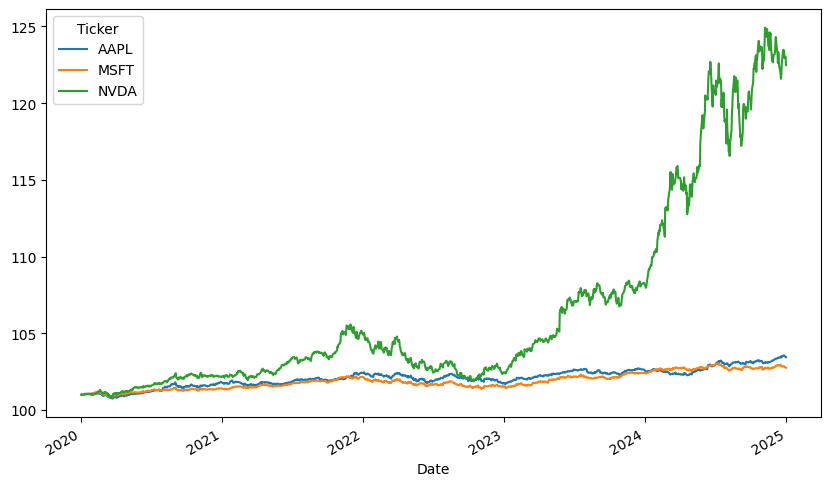

In [ ]:
(df/df.iloc[0] +100).plot(figsize=(10,6))

In [ ]:
log_returns = np.log(df/ df.shift(1))
log_returns.head()

Ticker,AAPL,MSFT,NVDA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.016135
2020-01-06,0.007937,0.002581,0.004185
2020-01-07,-0.004714,-0.009160,0.012034
2020-01-08,0.015958,0.015803,0.001874


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'NVDA'}>, <Axes: >]], dtype=object)

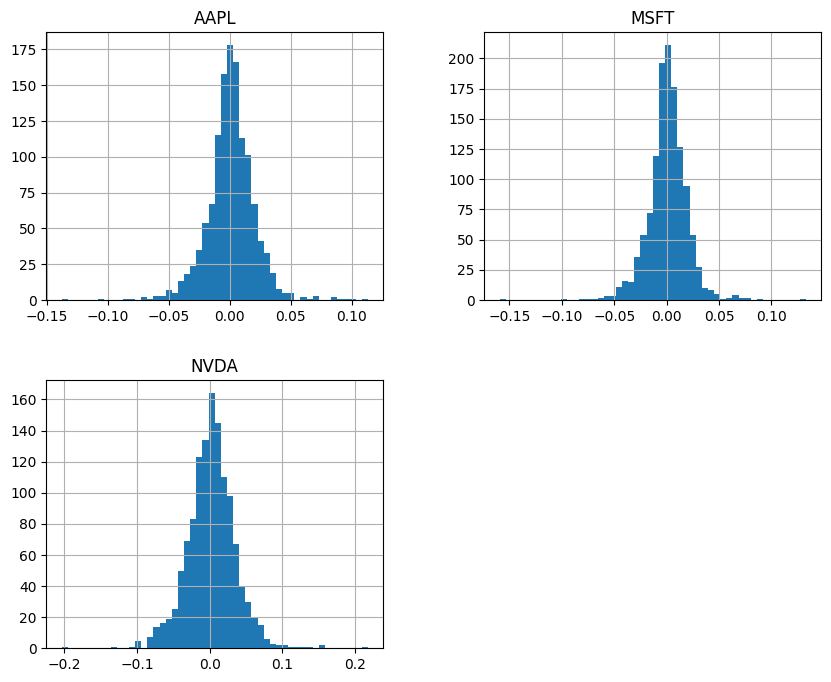

In [ ]:
log_returns.hist(bins=50,figsize=(10,8))

In [ ]:
log_returns = log_returns.dropna()
log_returns.describe()

Ticker,AAPL,MSFT,NVDA
count,1257.000000,1257.000000,1257.000000
mean,0.000983,0.000803,0.002476
std,0.019940,0.019228,0.033712
min,-0.137708,-0.159453,-0.203980
25%,-0.008460,-0.008210,-0.016125
50%,0.001186,0.001111,0.003286
75%,0.011918,0.010881,0.022061
max,0.113158,0.132929,0.218088


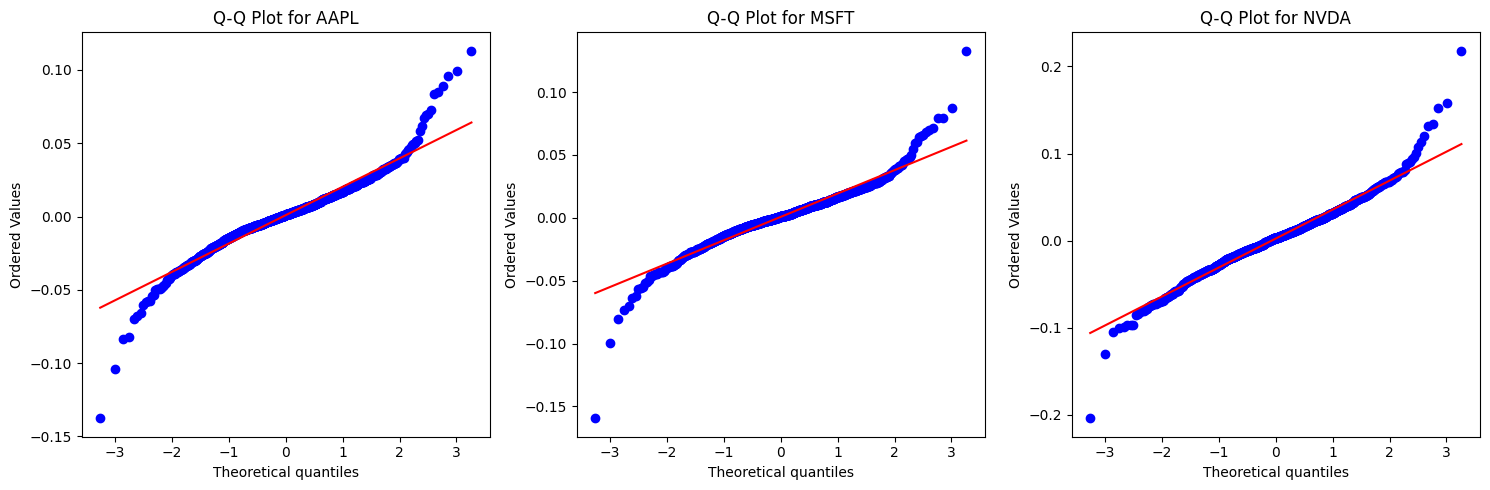

In [ ]:
# Create subplots for each ticker
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ticker in enumerate(tickers):
    stats.probplot(log_returns[ticker], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot for {ticker}")

plt.tight_layout()
plt.show()


In [ ]:
log_returns

Ticker,AAPL,MSFT,NVDA
Date,,,
2020-01-03,-0.009770,-0.012530,-0.016135
2020-01-06,0.007937,0.002581,0.004185
2020-01-07,-0.004714,-0.009160,0.012034
2020-01-08,0.015958,0.015803,0.001874
2020-01-09,0.021019,0.012416,0.010923
...,...,...,...
2024-12-24,0.011413,0.009330,0.003930
2024-12-26,0.003171,-0.002781,-0.002070
2024-12-27,-0.013331,-0.017453,-0.021088


In [ ]:
noa = len(tickers)
log_returns.mean()*252

,0
Ticker,
AAPL,0.247685
MSFT,0.202335
NVDA,0.624046


In [ ]:
log_returns.cov()*252

Ticker,AAPL,MSFT,NVDA
Ticker,,,
AAPL,0.100198,0.072552,0.104124
MSFT,0.072552,0.093167,0.112446
NVDA,0.104124,0.112446,0.286405


In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.09683437, 0.46248343, 0.44068221])

In [ ]:
weights.sum()

1.0

In [ ]:
expected_return = np.dot(weights, log_returns.mean()) * 252
print(expected_return)

0.3725352771797599


In [ ]:
np.dot(weights.T,np.dot(log_returns.cov()*252,weights))

0.13770726521881352

In [ ]:
math.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))

0.37108929547861325

In [ ]:
def port_ret(weights):
    return np.dot(weights, log_returns.mean()) * 252


def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))


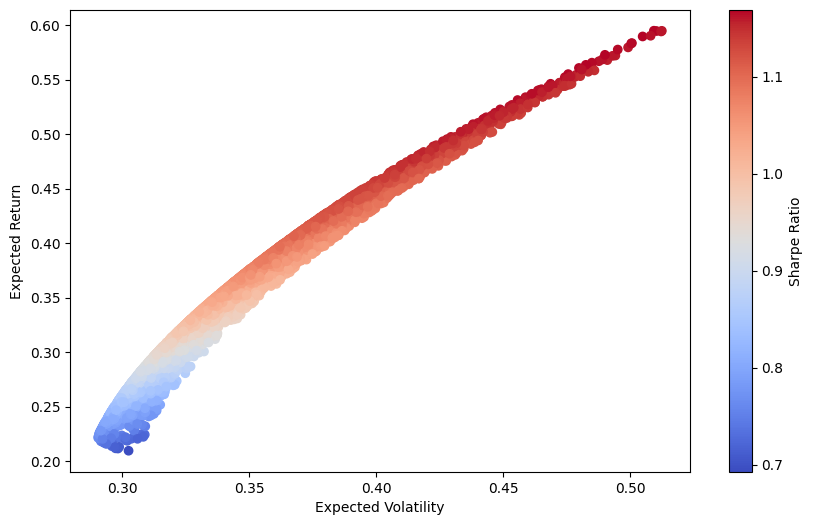

In [ ]:
prets = []
pvols = []
for p in range(5000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(10,6))
plt.scatter(pvols, prets, c=prets/pvols, cmap='coolwarm', marker='o')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


In [ ]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bnds = tuple((0,1) for x in range(noa))

eweights = np.array(noa*[1./noa,])

In [ ]:
min_func_sharpe(eweights)

-1.0442037929579304

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe,eweights,method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 33.4 ms, sys: 0 ns, total: 33.4 ms
Wall time: 34 ms


In [ ]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1690488735831293
       x: [ 1.407e-01  0.000e+00  8.593e-01]
     nit: 6
     jac: [ 3.378e-04  1.092e-01 -5.528e-05]
    nfev: 24
    njev: 6

In [ ]:
opts['x'].round(3)

array([0.141, 0.   , 0.859])

In [ ]:
port_ret(opts['x'].round(3))

0.5709791246841952

In [ ]:
port_vol(opts['x'].round(3))

0.48841345581689893

In [ ]:
port_ret(opts['x'])/port_vol(opts['x'])

1.1690488735831293

In [ ]:
optv = sco.minimize(port_vol,eweights,method='SLSQP',bounds=bnds,constraints=cons)

In [ ]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.290450044220725
       x: [ 4.271e-01  5.729e-01  5.725e-17]
     nit: 6
     jac: [ 2.904e-01  2.905e-01  3.749e-01]
    nfev: 24
    njev: 6

In [ ]:
optv['x'].round(3)

array([0.427, 0.573, 0.   ])

In [ ]:
port_ret(optv['x'].round(3))

0.22169982687663983

In [179]:
port_vol(optv['x'].round(3))

0.29045004598120683

In [180]:
port_ret(optv['x'])/port_vol(optv['x'])

0.763312232598054

In [181]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bnds = tuple((0, 1) for x in weights)

In [187]:
%time
trets = np.linspace(0.2, 0.65, 50)

tvols = []
for tret in trets:
    cons = (
        {'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

    if res.success:
        tvols.append(res.fun)
    else:
        tvols.append(np.nan)

tvols = np.array(tvols)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [188]:
valid_idx = ~np.isnan(tvols)
tvols_clean = tvols[valid_idx]
trets_clean = trets[valid_idx]

print("tvols_clean:", tvols_clean)
print("trets_clean:", trets_clean)
print("len(tvols_clean) =", len(tvols_clean))


tvols_clean: [0.29671794 0.29090026 0.29140623 0.29349855 0.29582411 0.29837684
 0.30115097 0.30414045 0.30733899 0.31074014 0.31433731 0.31812386
 0.32209312 0.3262384  0.3305531  0.33503065 0.33966469 0.34444871
 0.34937678 0.35444278 0.3596409  0.36496548 0.37041109 0.37597246
 0.38165209 0.38750885 0.39354834 0.39976227 0.40614264 0.41268173
 0.4193721  0.42620665 0.43317854 0.44028125 0.44750855 0.4548545
 0.46231344 0.46988001 0.47754907 0.48531577 0.4931755  0.50112388
 0.50915675 0.51727019 0.52546046 0.53372402]
trets_clean: [0.20918367 0.21836735 0.22755102 0.23673469 0.24591837 0.25510204
 0.26428571 0.27346939 0.28265306 0.29183673 0.30102041 0.31020408
 0.31938776 0.32857143 0.3377551  0.34693878 0.35612245 0.36530612
 0.3744898  0.38367347 0.39285714 0.40204082 0.41122449 0.42040816
 0.42959184 0.43877551 0.44795918 0.45714286 0.46632653 0.4755102
 0.48469388 0.49387755 0.50306122 0.5122449  0.52142857 0.53061224
 0.53979592 0.54897959 0.55816327 0.56734694 0.57653061 0.5

In [189]:
cons_min_ret = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
res_min = sco.minimize(port_ret, eweights, method='SLSQP', bounds=bnds, constraints=cons_min_ret)
print("Min return feasible?", res_min.success)
print("Min return:", port_ret(res_min.x))

cons_max_ret = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
res_max = sco.minimize(lambda x: -port_ret(x), eweights, method='SLSQP', bounds=bnds, constraints=cons_max_ret)
print("Max return feasible?", res_max.success)
print("Max return:", port_ret(res_max.x))


Min return feasible? True
Min return: 0.20233538259553988
Max return feasible? True
Max return: 0.6240459692976321


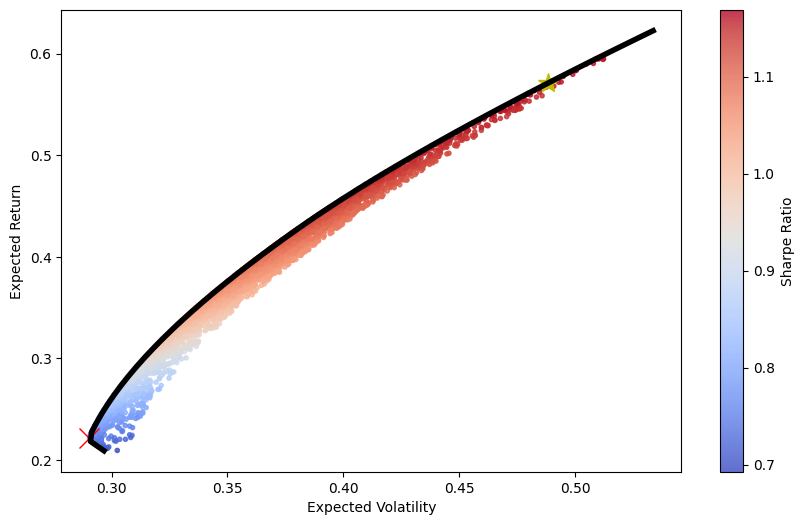

In [190]:
plt.figure(figsize=(10, 6))

plt.scatter(pvols, prets, c=prets/pvols, marker='.', alpha=0.8, cmap='coolwarm')

plt.plot(tvols_clean, trets_clean, 'k', lw=4.0, zorder=10)

plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'rx', markersize=15.0)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
